In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from funcs import *
%matplotlib inline

- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains the test results for the microchips from two tests
  - `y_train` contains the results of the QA  
      - `y_train = 1` if the microchip was accepted 
      - `y_train = 0` if the microchip was rejected 
  - Both `X_train` and `y_train` are numpy arrays.

In [2]:
# load dataset
X_train, y_train = load_data("dataset/microchips.txt")

In [3]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [4]:
# Check the dimensions of your variables

print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


#### Visualize your data

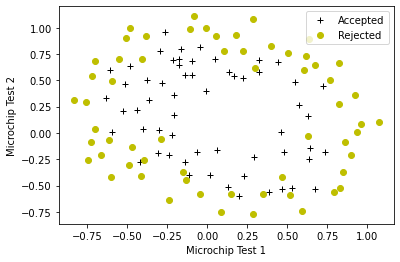

In [5]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

The plot above shows that the dataset cannot be separated into positive and negative examples by a straight-line. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.


#### Feature mapping
we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

In [6]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [7]:
# print the first elements of X_train and mapped_X to see the tranformation.

print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector. 

- A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot. 

- While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. 


#### Implement regularized logistic regression to fit the data 

In [8]:
# sigmoid
def sigmoid(z):
    g = 1 / (1 + (np.exp(-z)))
    return g


#  compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    m, n = X.shape
    loss_sum = 0.0
    
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        loss = (-y[i] * np.log(f_wb)) - (1-y[i])* np.log(1-f_wb)
        loss_sum += loss
    
    total_cost = 1/m * loss_sum

    return total_cost

In [9]:
# compute regularized cost

def compute_cost_reg(X, y, w, b, lambda_ = 1):

    m, n = X.shape
    
    # Call the compute_cost function above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    reg_cost = 0.
    
    for j in range(n):
        reg_cost_j = w[j] ** 2
        reg_cost += reg_cost_j
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

In [10]:
# calculate regularized cost with initial parameter

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.6618252552483948


#### Gradient for regularized logistic regression

In [11]:
# compute_gradient

def compute_gradient(X, y, w, b, lambda_=None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.0

    for i in range(m):
        z_wb = np.dot(X[i],w) + b
        f_wb = sigmoid(z_wb)
        
        dj_dw_i = (f_wb - y[i]) * X[i]
        dj_dw += dj_dw_i
        
        dj_db_i = f_wb -y[i]
        dj_db += dj_db_i
            
    dj_dw = 1/m * dj_dw
    dj_db = 1/m * dj_db
        
    return dj_db, dj_dw

In [12]:
# regularized gradient

def compute_gradient_reg(X, y, w, b, lambda_ = 1): 

    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    
    for j in range(n):
        dj_dw_j_reg =  (lambda_ * w[j])/ m
        dj_dw[j] = dj_dw[j] + dj_dw_j_reg        
        
    return dj_db, dj_dw

In [13]:
# calcualte gradient with initial values of the parameter w and b

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548703, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]


#### Find the parameters w and b using gradient descent

In [14]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [15]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ 
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


In [17]:
print(F"w: {w}\n b: {b}")

w: [ 0.91430359  1.4923378  -2.59208306 -1.0206783  -1.70874963 -0.09508199
 -0.70729902 -0.45522579 -0.2625241  -1.50258859 -0.14183125 -0.44103606
 -0.5216627  -0.85782008 -0.62213889 -0.0730526  -0.11749311 -0.22665893
 -0.62206091 -0.81773062 -0.81412362  0.47440112 -0.48661532  0.20171914
  0.03665575  0.27726316 -1.43466503]
 b: 1.43411872285427


#### Plotting the decision boundary


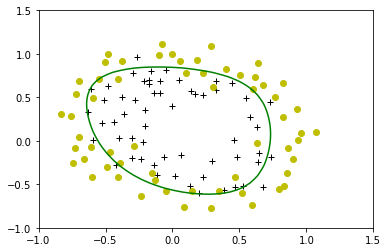

In [18]:
plot_decision_boundary(w, b, X_mapped, y_train)

#### Prediction

In [19]:
# predict

def predict(X, w, b): 

    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    # Loop over each example
    for i in range(m):   
        z_wb = 0.0
        
        
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb_ij = X[i,j] * w[j]
            z_wb += z_wb_ij
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        if f_wb >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
        
    return p

#### Task: 
- Predict if microchips with the following test results will be accepted or rejected

<table>
    <tr>
        <td></td>
        <td>Test1</td>
        <td>Test2</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0.051267</td>
        <td>0.69956 </td>
    </tr>
    <tr>
        <td>2</td>
        <td>-0.092742</td>
        <td>0.68494</td>
    </tr>
    <tr>
        <td>3</td>
        <td>-0.21371</td>
        <td>0.69225</td>
    </tr>

</table>

 

In [20]:
# make prediction

tests_X = np.array([[0.051267, 0.69956 ], [-0.092742, 0.68494], [-0.21371, 0.69225 ]])

accepted = predict(tests_X, w, b)
print(accepted)

[1. 1. 1.]


#### Prediction
<table>
    <tr>
        <td></td>
        <td>Test1</td>
        <td>Test2</td>
        <td>Prediction</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0.051267</td>
        <td>0.69956 </td>
        <td>1</td>
    </tr>
    <tr>
        <td>2</td>
        <td>-0.092742</td>
        <td>0.68494</td>
        <td>1</td>
    </tr>
    <tr>
        <td>3</td>
        <td>-0.21371</td>
        <td>0.69225</td>
        <td>1</td>
    </tr>

</table>

 

####  Evaluating regularized logistic regression model

In [21]:
#Compute accuracy on the training set

p = predict(X_mapped, w, b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
